In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns", None)


In [216]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
dataset = dataset.drop(["Name", "Ticket", "PassengerId"], axis = 1)

In [218]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [219]:
dataset.shape

(891, 9)

In [220]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [221]:
a = 0
for i in range(1, 892):
    for feature in dataset.columns:
        if feature == 'O' or feature != 'O':
            a = a+1
        else:
            pass
print(a)

8019


In [222]:
cate_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == 'O']

In [223]:
cate_with_nan

['Cabin', 'Embarked']

In [224]:
# for handling the nan values
for feature in cate_with_nan:
    data = dataset.copy()
    data[feature] = data[feature].fillna("Missing")
    dataset[feature] = data[feature]

In [225]:
dataset[cate_with_nan].isnull().sum()

Cabin       0
Embarked    0
dtype: int64

In [226]:
dataset.Age.isnull().sum()

177

In [227]:
median_value = dataset.Age.median()
median_value

28.0

In [228]:
dataset.Age = dataset.Age.fillna(median_value)

In [229]:
dataset.Age.isnull().sum()

0

In [230]:
dataset["Cabin"].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [231]:
dataset = dataset.drop(["Cabin"], axis = 1)

In [232]:
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [233]:
# just for confirmation that is there any feature containing nan values 
nan_feature = [feature for featrue in dataset.columns if dataset[feature].isnull().sum()>1]
nan_feature

[]

In [234]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

In [235]:
categorical_feature

['Sex', 'Embarked']

In [236]:
# converting the categorical features into numerical features

converted_categorical_feature = pd.get_dummies(dataset[categorical_feature], drop_first = True)
converted_categorical_feature.head()

,Sex_male,Embarked_Missing,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,1


In [237]:
dataset = dataset.drop(["Sex", "Embarked"], axis = 1)

In [238]:
dataset = pd.concat([dataset, converted_categorical_feature], axis = 1)
dataset.head(7)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
5,0,3,28.0,0,0,8.4583,1,0,1,0
6,0,1,54.0,0,0,51.8625,1,0,0,1


In [239]:
num_feature = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ["Survived"]]
num_feature

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_Missing',
 'Embarked_Q',
 'Embarked_S']

In [240]:
from sklearn.preprocessing import MinMaxScaler


In [241]:
minmax = MinMaxScaler()
minmax.fit(dataset[num_feature])

MinMaxScaler()

In [242]:
dataset[num_feature] = minmax.transform(dataset[num_feature])

In [243]:
X_dataset = dataset.iloc[:, 1:]
X_dataset.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Missing', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [244]:
Y_dataset = dataset.iloc[:, 0]
Y_dataset

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [245]:
# splitting the data into train-test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size = 0.2, random_state = 0)



In [246]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()


In [247]:
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

In [248]:
y_pred = logistic_regression.predict(X_test)

In [249]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [250]:
from sklearn.metrics import confusion_matrix, classification_report

In [251]:
print(confusion_matrix(Y_test, y_pred))

[[92 18]
 [18 51]]


In [252]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [256]:
# finding the value of K

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_dataset, Y_dataset, cv = 10)
    error_rate.append(1-score.mean())

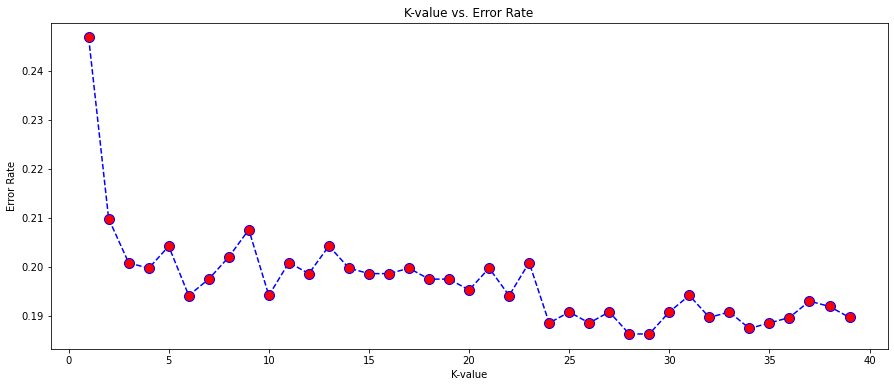

In [264]:
plt.figure(figsize = (15, 6))
plt.plot(range(1, 40), error_rate, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor='red', markersize = 10)
plt.xlabel("K-value")
plt.ylabel("Error Rate")
plt.title("K-value vs. Error Rate")
plt.show()

In [265]:
KNN = KNeighborsClassifier(n_neighbors = 28)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=28)

In [266]:
y_pred_KNN = KNN.predict(X_test)

In [267]:
print(confusion_matrix(Y_test, y_pred_KNN))

[[104   6]
 [ 27  42]]


In [269]:
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.88      0.61      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179

